# Clustering mit Linkage-basierten Verfahren

### Aufgabe 1: Linkage-based Clustering von Hand (4 Punkte)
Verwenden Sie für diese Aufgabe bitte den untenstehenden Datensatz. Berechnen Sie zwei Dendrogramme für diesen Datensatz. Erstellen Sie die Dendrogramme bitte von Hand auf einem Blatt Papier. Als Distanzfunktion zwischen den Punkten dient die L1 Norm (Manhattan Distanz). Als Distanzfunktion zwischen Mengen von Objekten verwenden Sie
1. den Single Linkage Ansatz
2. den Complete Linkage Ansatz

Tipp: Innere Knoten müssen nicht binär sein, d.h. sie können mehr als zwei Söhne haben.

Abgabe: Laden Sie Ihre Lösung bitte als separate PDF-Datei / als Bild hoch.

<img src="./img/Datensatz.jpg" width = 500>

### Lösung:

<img src='ML2_Praktikum_1.jpg'>

Bei gleichen Distanzen alphabetisch vorgehen.<br>
<br>
#### Notiz:
**Single Linakge** (kleinste Minimale Distanz)<br>
B-D -> BD (1)<br>
BD-C -> BDC (1 -> min Distanz)<br>
BDC-E -> BDCE(1)<br>
BDCE-F -> BDCEF (1)<br>
H-I -> HI (1)<br>
HI-K -> HIK (1)<br>
HIK-L -> HIKL (1)<br>
BDCEF-A -> BDCEFA (2)<br>
HIKL-G -> HIKLG (3)<br>
BDCEFA-HIKLG -> BEDCEFAHIKLG (5)<br>

**Complete Linkage** (kleinste Maximale Distanz)<br>
B-D -> BD (1)<br>
E-F -> EF (1)<br>
H-I -> HI (1)<br>
K-L -> KL (1)<br>
A-C -> AC (2)<br>
HI-KL -> HIKL (2)<br>
BD-EF -> BDEF (3)<br>
AC-BDEF -> ACBEDEF (5)<br>
HIKL-G -> HIKLG (5)<br>
ACBEDEF-HIKLG -> ACBEDEFHIKLG (15)

### Aufgabe 2: Linkage-based Clustering in sklearn (4 Punkte)
Verwenden Sie für die folgende Übung erneut die Daten "Clusters1.txt" und "4cluster.csv", die bereits im K-Means-Übungsblatt verwendet wurden. 
1. Laden Sie die Daten und führen Sie ggf. notwendige Vorverarbeitungsschritte durch
2. Clustern Sie die Datensätze jeweils unter Verwendung eines Linkage Verfahrens (``sklearn.cluster.AgglomerativeClustering``). Stellen Sie die richtige Anzahl Cluster ein (ansonsten können Sie zunächst die Default-Einstellungen verwenden). Achten Sie darauf, bei 4cluster.csv nicht die ground-truth-Spalte mit zu verwenden! 
3. Plotten Sie beide Datensätze und färben Sie diese jeweils gemäß der Cluster-Zuordnungen ein

### 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

data_1 = 4cluster.csv<bR>
data_2 = Cluster1.txt

#### Data 1 (4cluster.csv)

In [2]:
data_1 = pd.read_csv("./data/4cluster.csv", sep=",")
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        500 non-null    float64
 1   y        500 non-null    float64
 2   cluster  500 non-null    object 
dtypes: float64(2), object(1)
memory usage: 11.8+ KB


In [3]:
data_1.head()

,x,y,cluster
0,66.17,0.407,Cluster_0
1,67.07,0.453,Cluster_0
2,61.83,0.413,Cluster_0
3,69.53,0.312,Cluster_0
4,62.26,0.415,Cluster_0


In [4]:
data_1.cluster.value_counts()

Cluster_3    125
Cluster_0    125
Cluster_1    125
Cluster_2    125
Name: cluster, dtype: int64

In [5]:
# Cluster ändern zu numerische Werte
mapping = {'Cluster_0':0, 'Cluster_1':1, 'Cluster_2':2, 'Cluster_3':3}
data_1['cluster'] = data_1['cluster'].map(mapping)
data_1.cluster.value_counts()

0    125
1    125
2    125
3    125
Name: cluster, dtype: int64

#### Data 2 (cluster1)

In [6]:
data_2 = pd.read_csv("./data/Cluster1.txt", sep=",", header=None)
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       86 non-null     float64
 1   1       86 non-null     float64
dtypes: float64(2)
memory usage: 1.5 KB


In [7]:
data_2.head()

,0,1
0,3.42,21.3
1,3.22,20.0
2,4.22,20.4
3,4.27,21.5
4,5.62,20.9


#### -- Normalisieren --

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_1.x = scaler.fit_transform(data_1.x.to_numpy().reshape(-1, 1))
data_1.y = scaler.fit_transform(data_1.y.to_numpy().reshape(-1, 1))

data_2[0] = scaler.fit_transform(data_2[0].to_numpy().reshape(-1, 1))
data_2[1] = scaler.fit_transform(data_2[1].to_numpy().reshape(-1, 1))

### 2)

In [9]:
from sklearn.cluster import AgglomerativeClustering

model_1 = AgglomerativeClustering(n_clusters=4).fit(data_1.iloc[:, [0, 1]])

In [10]:
model_2 = AgglomerativeClustering(n_clusters=3).fit(data_2)

### 3)

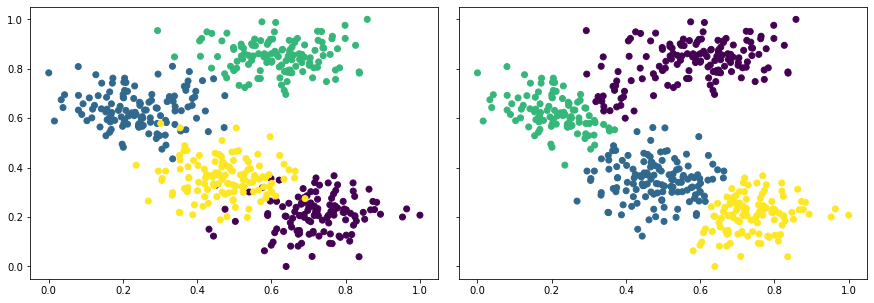

In [11]:
fig, ax = plt.subplots(1, 2, sharey=True)

fig.set_size_inches(15, 5)

ax[0].scatter(data_1.x, data_1.y, c=data_1.cluster)
ax[1].scatter(data_1.x, data_1.y, c=model_1.labels_)

plt.subplots_adjust(wspace=0.05)

In [12]:
# Relabeling
# Modified my own algorithm from last time
model_labels = model_1.labels_
data_labels = data_1.cluster

# creating a list with all indexes/positions for all labels
# step 1
map_indexes = dict()

for i, elem in enumerate(model_labels):
    if elem not in map_indexes.keys():
        map_indexes[elem] = [i]
    else:
        map_indexes[elem] += [i]
        
# saves the index where this number appears
#map_indexes

In [13]:
# finding interface of the two labels
# step 2
label_interface = dict()

for i, elem in enumerate(map_indexes):
    if elem not in label_interface.keys():
        label_interface[elem] = [data_labels.iloc[i]]
    else:
        label_interface[elem] += [data_labels.iloc[i]]

In [14]:
# Remapping
# step 3 and 4
import statistics as sta

mapping = dict()
for i, elem in enumerate(map_indexes):
    label = sta.median(data_labels.iloc[map_indexes[i]])
    print(label, "wird zu", i)
    mapping[label] = i

data_1.cluster = data_labels.map(mapping)

2 wird zu 0
3 wird zu 1
1 wird zu 2
0 wird zu 3


#### Erklärung meines aktualisierten Algorithmus.
Da die Position der Daten in beiden Labellisten gleich ist, vergleiche ich beide Listen und versuche herauszufinden wo die Label in der jeweiligen anderen liegen. Wenn also die ersten 3 Label 0 sind und die ersten 3 Label des Anderen 2, so weis man das der eine 0 zu 2 gemappt hat bzw. anders herum, jenachdem welche Liste man nun angleichen möchte.
Hier die Arbeitsschritte hierfür:
1. Speichere alle Indexe jedes Labels ab (von einer Labelliste ab)
2. Speichere alle Werte dieser Indexe ab (in anderer Labelliste)
3. Bilde Median oder Mean dieser Werte ab und du erhälst das equivalente Label
4. Verändere nun einer der beiden Listen so, dass die gleichen Labels entstehen


### Remapping zu Ende
Ergebnis anschauen

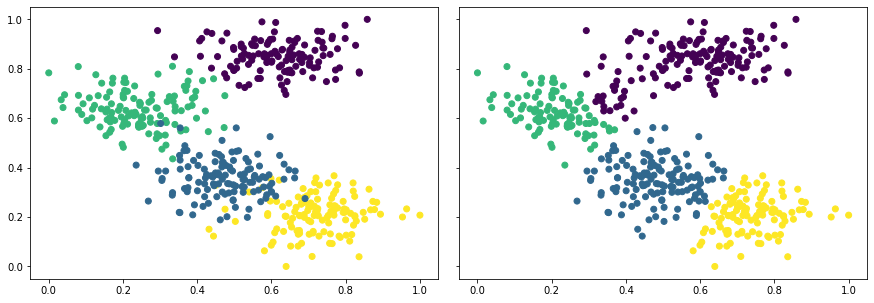

In [15]:
fig, ax = plt.subplots(1, 2, sharey=True)

fig.set_size_inches(15, 5)

ax[0].scatter(data_1.x, data_1.y, c=data_1.cluster)
ax[1].scatter(data_1.x, data_1.y, c=model_1.labels_)

plt.subplots_adjust(wspace=0.05)

Drawing data_2 and model_2 clustering reults

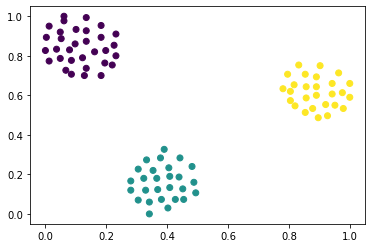

In [16]:
fig = plt.figure
ax = plt.axes()

ax.scatter(data_2[0], data_2[1], c=model_2.labels_)

### Aufgabe 3: Plotten eines Dendrogramms (4 Punkte)

Plotten Sie nun die Dendrogramme für die beiden Datensätze. Sie können sich an diesem Code orientieren und dürfen auch Teile davon kopieren (vergessen Sie in diesem Fall nicht den Code entsprechend anzupassen!): https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html 

In Ihrem Dendrogramm sollten *alle* Level zu sehen sein. 

In [17]:
model_1 = AgglomerativeClustering(n_clusters=None, distance_threshold=True).fit(data_1.iloc[:, [0, 1]])
model_2 = AgglomerativeClustering(n_clusters=None, distance_threshold=True).fit(data_2)

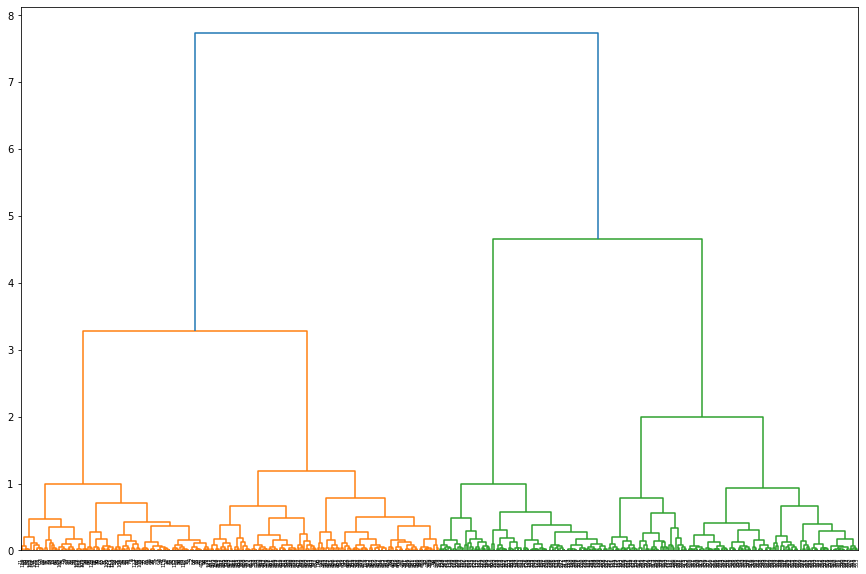

In [18]:
from scipy.cluster.hierarchy import dendrogram

# Create linkage matrix and then plot the dendrogram

# create the counts of samples under each node
counts = np.zeros(model_1.children_.shape[0])
n_samples = len(model_1.labels_)
for i, merge in enumerate(model_1.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [model_1.children_, model_1.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
plt.rcParams["figure.figsize"] = (15, 10)
dendrogram(linkage_matrix)

print("")    # that there is no output print from dendrogram method

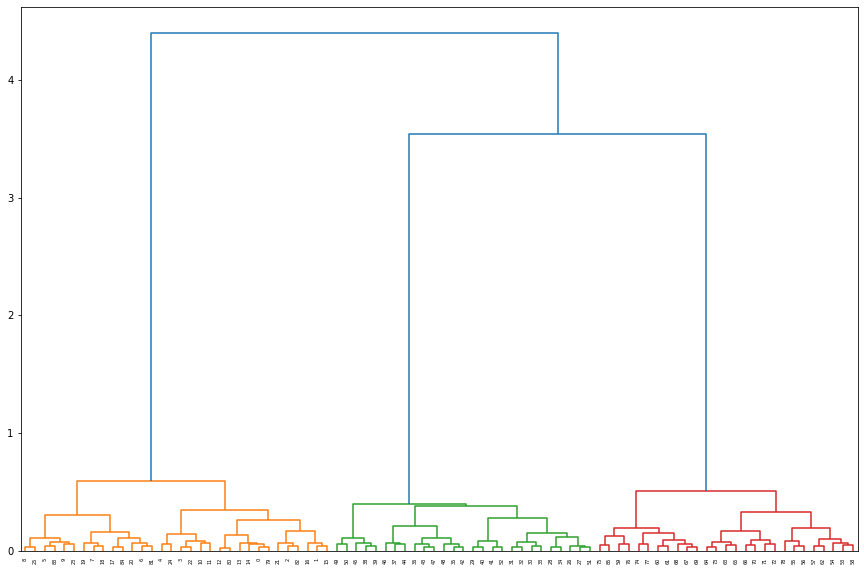

In [19]:
# Create linkage matrix and then plot the dendrogram

# create the counts of samples under each node
counts = np.zeros(model_2.children_.shape[0])
n_samples = len(model_2.labels_)
for i, merge in enumerate(model_2.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix = np.column_stack(
    [model_2.children_, model_2.distances_, counts]
).astype(float)

# Plot the corresponding dendrogram
plt.rcParams["figure.figsize"] = (15, 10)
dendrogram(linkage_matrix)

print("")    # that there is no output print from dendrogram method

### Aufgabe 4: Auswirkung der Linkage Methode (4 Punkte)

Führen Sie sowohl für den Datensatz "spiral.csv" als auch für "Cluster9.txt" folgende Schritte durch: 

1. Laden Sie den Datensatz
2. Plotten Sie den Datensatz. Bei "spiral.csv" können Sie zur Einfärbung die in der Spalte "cluster" vorgegebene ClusterID verwenden.
3. Plotten Sie für den Datensatz mehrere Dendrogramme, wobei Sie jeweils unterschiedliche Linkage-Methoden verwenden sollten. Verwenden Sie jeweils aussagekräftige, sprechende Titel für die Dendrogramme!
4. Entscheiden Sie sich jeweils *anhand des Dendrogramms* für eine angemessene Anzahl Cluster. Rufen Sie ``AgglomerativeClustering`` dann mit der entsprechenden Anzahl Cluster auf (unter Verwendung der jeweiligen Linkage-Methode) und plotten Sie die Punkte, eingefärbt mit ihrer Cluster-Zugehörigkeit, anschließend in einem Scatterplot. Verwenden Sie auch hier aussagekräftige Titel!
5. Welche Linkage-Methode scheint Ihnen für den Datensatz am besten geeignet? Mit welcher Anzahl Cluster würden Sie sie verwenden? (Hier ist eine textuelle Antwort gefragt)

In [20]:
# resetting the param options
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (10, 8)

### Load Data

------ spiral.csv - data_3 ------

In [21]:
data_3 = pd.read_csv("./data/spiral.csv", sep=";")
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        312 non-null    float64
 1   y        312 non-null    float64
 2   cluster  312 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 7.4 KB


In [22]:
data_3.head()

,x,y,cluster
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [23]:
data_3.columns

Index(['x', 'y', 'cluster'], dtype='object')

In [24]:
data_3.cluster.unique()

array([3, 1, 2], dtype=int64)

In [25]:
data_3.cluster.value_counts()

3    106
2    105
1    101
Name: cluster, dtype: int64

------ Cluster9.txt - data_4 ------

In [26]:
data_4 = pd.read_csv("./data/Cluster9.txt", sep=",", header=None)
data_4.rename(columns={0:'x', 1:'y'}, inplace=True)
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       123 non-null    float64
 1   y       123 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB


In [27]:
data_4.head()

,x,y
0,-9.832695,4.243830
1,-8.881666,4.853489
2,3.427477,-7.389413
3,-10.145905,5.177261
4,-0.249888,-7.734553


### ---- Normalisieren ----

In [28]:
scaler = MinMaxScaler()

data_3.x = scaler.fit_transform(data_3.x.to_numpy().reshape(-1, 1))
data_3.y = scaler.fit_transform(data_3.y.to_numpy().reshape(-1, 1))

data_4.x = scaler.fit_transform(data_4.x.to_numpy().reshape(-1, 1))
data_4.y = scaler.fit_transform(data_4.y.to_numpy().reshape(-1, 1))

In [29]:
data_3.head()

,x,y,cluster
0,1.000000,0.175652,3
1,0.972366,0.153043,3
2,0.948187,0.130435,3
3,0.922280,0.107826,3
4,0.894646,0.092174,3


In [30]:
print(f"{data_3.loc[:, ['x', 'y']].min()}\n\n{data_3.loc[:, ['x', 'y']].max()}")

x    0.0
y    0.0
dtype: float64

x    1.0
y    1.0
dtype: float64


In [31]:
data_4.head()

,x,y
0,0.075217,0.810805
1,0.129065,0.849471
2,0.826029,0.073000
3,0.057482,0.870005
4,0.617810,0.051111


In [32]:
print(f"{data_4.min()}\n\n{data_4.max()}")

x    0.0
y    0.0
dtype: float64

x    1.0
y    1.0
dtype: float64


### 2) Plotten

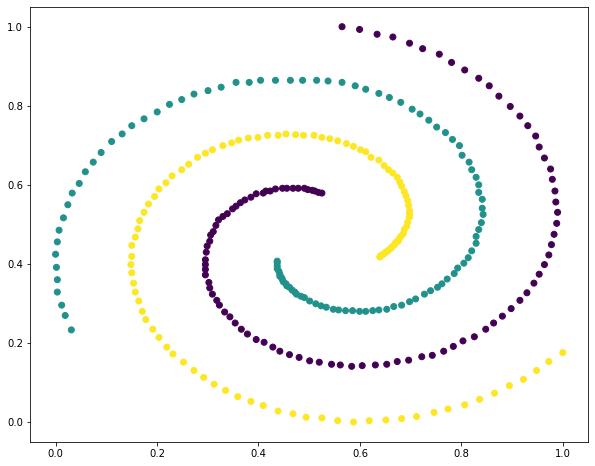

In [33]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(data_3.x, data_3.y, c=data_3.cluster)

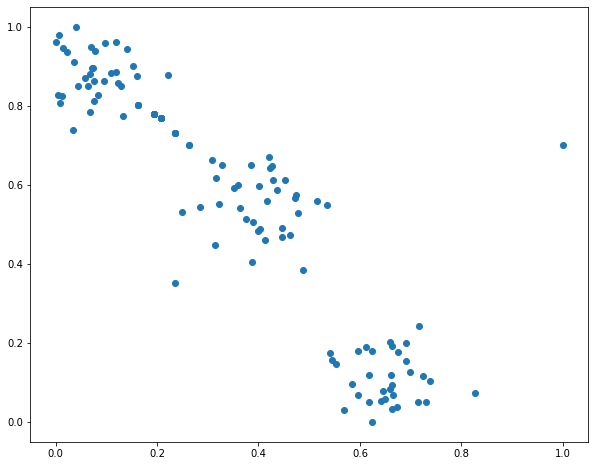

In [34]:
fig = plt.figure()
ax = plt.axes()

ax.scatter(data_4.x, data_4.y)

### 3) Dendrogramme mit unterschiedlichen Linkage-Verfahren

In [35]:
plt.rcParams["figure.figsize"] = (15, 10)

In [36]:
def draw_dendrogram(linkage:str, data, data_name="spiral.csv"):
    model = AgglomerativeClustering(linkage=linkage, n_clusters=None, distance_threshold=True).fit(data)

    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    plt.title(f"Dendrogramm - {linkage.title()} Linkage ({data_name})")
    dendrogram(linkage_matrix)
  
    print("")    # that there is no output print from dendrogram method

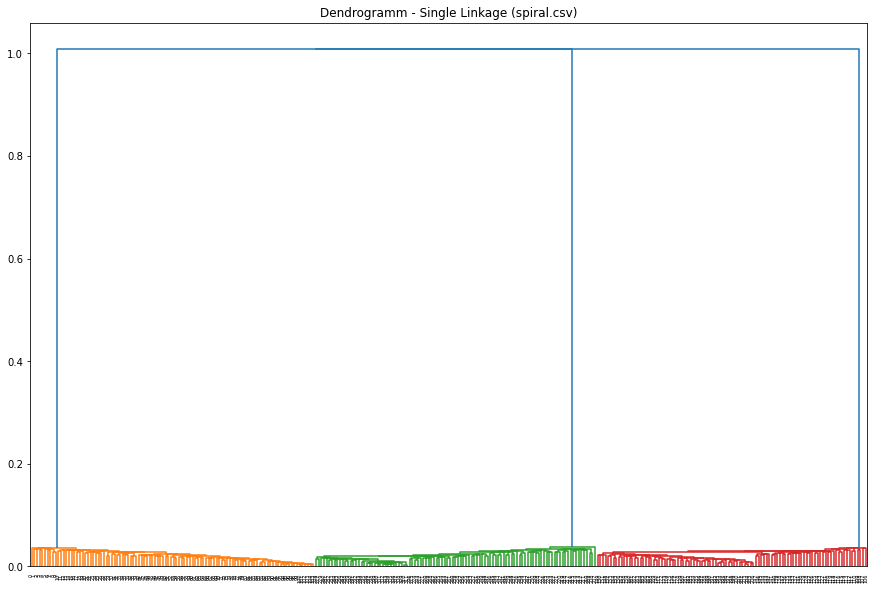

In [37]:
draw_dendrogram('single', data_3)

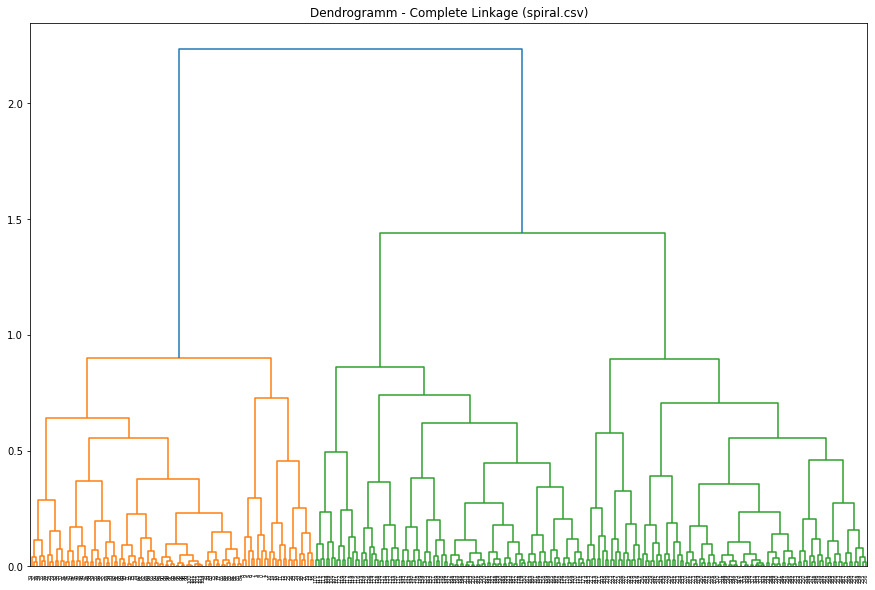

In [38]:
draw_dendrogram('complete', data_3)

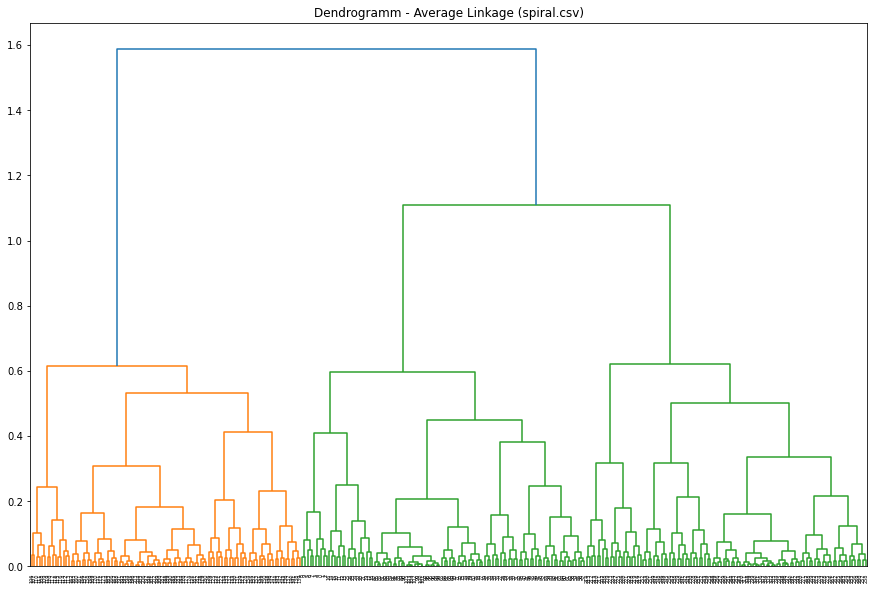

In [39]:
draw_dendrogram("average", data_3)

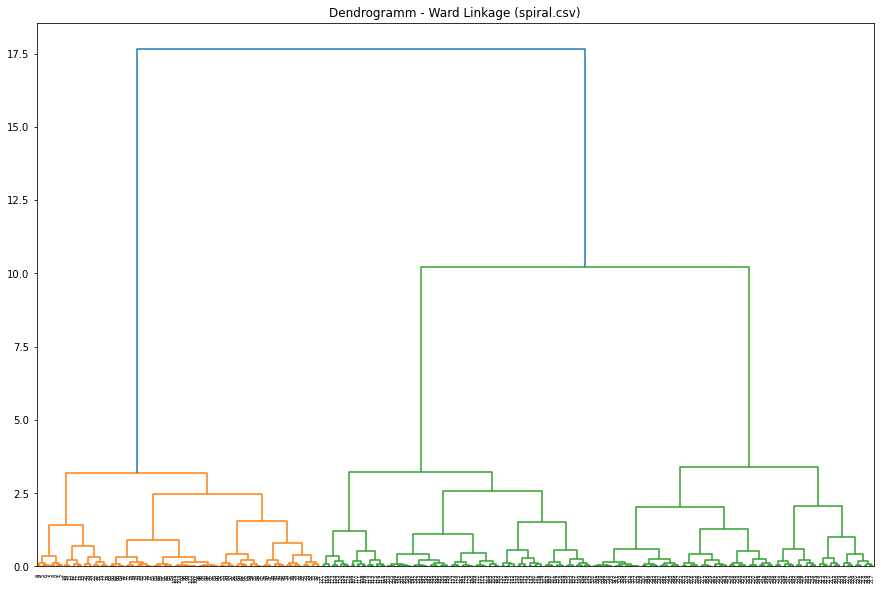

In [40]:
draw_dendrogram("ward", data_3)

---

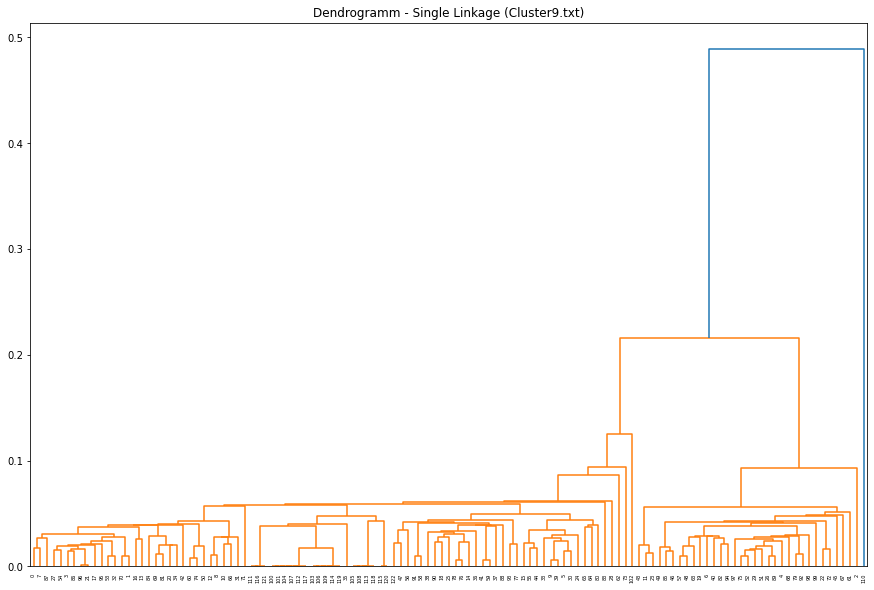

In [41]:
draw_dendrogram('single', data_4, "Cluster9.txt")

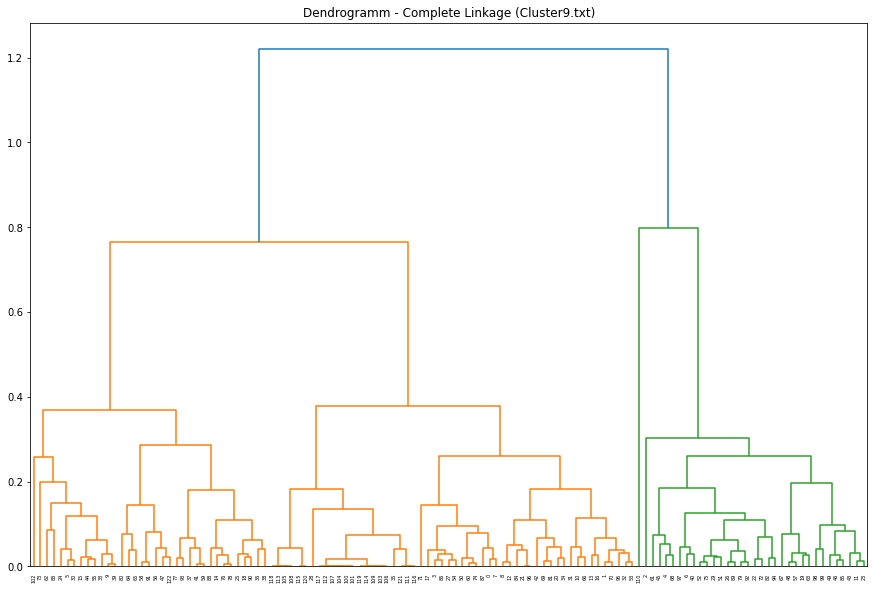

In [42]:
draw_dendrogram('complete', data_4, "Cluster9.txt")

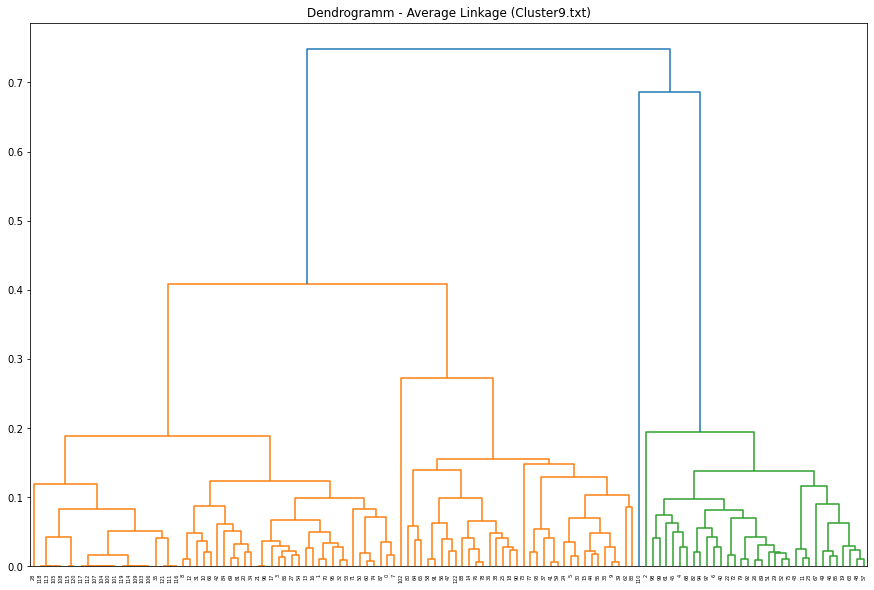

In [43]:
draw_dendrogram('average', data_4, "Cluster9.txt")

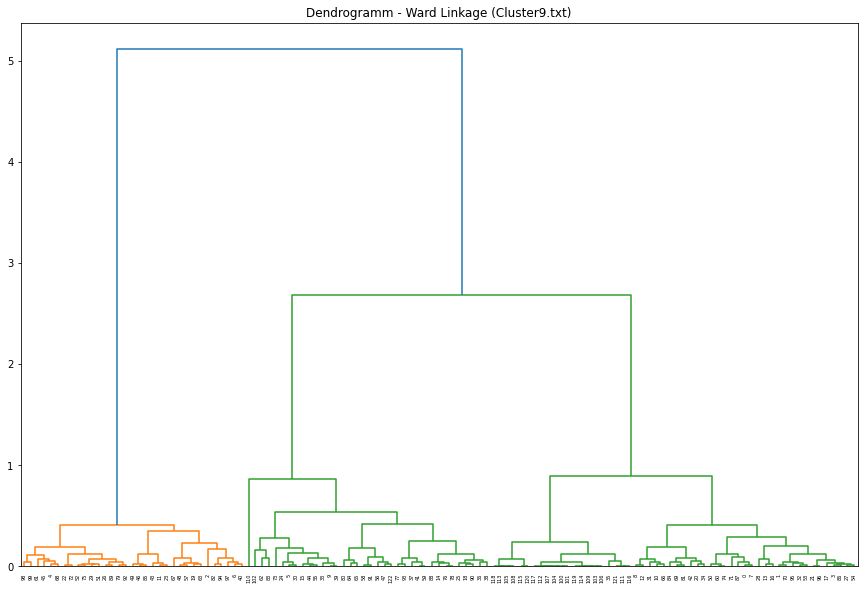

In [44]:
draw_dendrogram('ward', data_4, "Cluster9.txt")

### 4) Model training and prediction

In [45]:
#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (10, 8)

---
spiral.csv

---
Alle Dendrogramme zeigen recht deutlich 3 Cluster. Bei dem Complete Linkage und bei dem Average Linkage könnte man auch 2 Cluster annehmen, aber auch dort sieht es eher nach 3 Clustern aus.

Training

In [46]:
model_0 = AgglomerativeClustering(linkage="single", n_clusters=3, distance_threshold=None).fit(data_3)
model_1 = AgglomerativeClustering(linkage="complete", n_clusters=3, distance_threshold=None).fit(data_3)
model_2 = AgglomerativeClustering(linkage="average", n_clusters=3, distance_threshold=None).fit(data_3)
model_3 = AgglomerativeClustering(linkage="ward", n_clusters=3, distance_threshold=None).fit(data_3)

Plotting

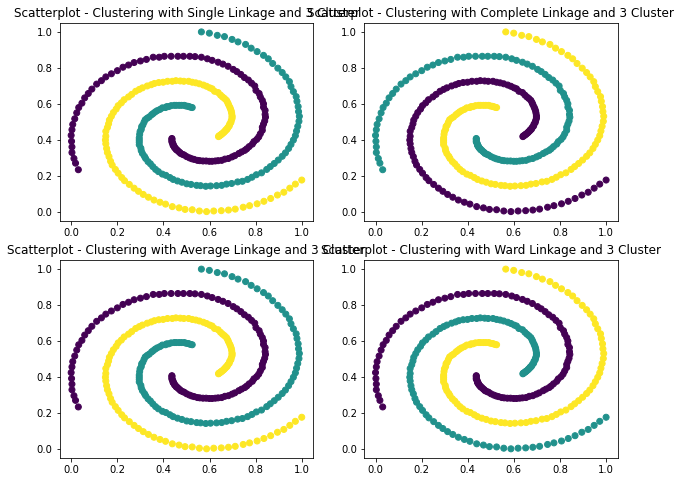

In [47]:
fig, ax = plt.subplots(2, 2)

# there are 2 spellings -> see below
ax[0][0].set_title("Scatterplot - Clustering with Single Linkage and 3 Cluster")
ax[0][0].scatter(data_3.x, data_3.y, c=model_0.labels_)

ax[0, 1].set_title("Scatterplot - Clustering with Complete Linkage and 3 Cluster")
ax[0, 1].scatter(data_3.x, data_3.y, c=model_1.labels_)

ax[1, 0].set_title("Scatterplot - Clustering with Average Linkage and 3 Cluster")
ax[1, 0].scatter(data_3.x, data_3.y, c=model_2.labels_)

ax[1, 1].set_title("Scatterplot - Clustering with Ward Linkage and 3 Cluster")
ax[1, 1].scatter(data_3.x, data_3.y, c=model_3.labels_)

plt.show()    # that there is no output print

---
Cluster9.txt

---

Training

In [48]:
model_0 = AgglomerativeClustering(linkage="single", n_clusters=3, distance_threshold=None).fit(data_4)
model_1 = AgglomerativeClustering(linkage="complete", n_clusters=2, distance_threshold=None).fit(data_4)
model_2 = AgglomerativeClustering(linkage="average", n_clusters=4, distance_threshold=None).fit(data_4)
model_3 = AgglomerativeClustering(linkage="ward", n_clusters=3, distance_threshold=None).fit(data_4)

Plotting

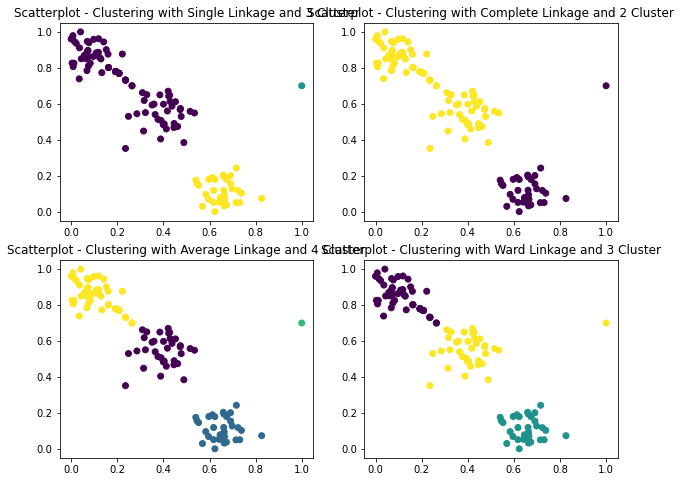

In [49]:
fig, ax = plt.subplots(2, 2)

# there are 2 spellings -> see below
ax[0][0].set_title("Scatterplot - Clustering with Single Linkage and 3 Cluster")
ax[0][0].scatter(data_4.x, data_4.y, c=model_0.labels_)

ax[0, 1].set_title("Scatterplot - Clustering with Complete Linkage and 2 Cluster")
ax[0, 1].scatter(data_4.x, data_4.y, c=model_1.labels_)

ax[1, 0].set_title("Scatterplot - Clustering with Average Linkage and 4 Cluster")
ax[1, 0].scatter(data_4.x, data_4.y, c=model_2.labels_)

ax[1, 1].set_title("Scatterplot - Clustering with Ward Linkage and 3 Cluster")
ax[1, 1].scatter(data_4.x, data_4.y, c=model_3.labels_)

plt.show()    # that there is no output print

### 5) Auswahl der Parameter

---
spiral.csv

---
**Linkage-Verfahren:**
Meine Wahl fällt hierbei auf das Single Linkage Verfahren, da es mich beim Dendrogramm am meisten überzeugen konnte. Es hat die 3 Cluster viel eindeutiger getrennt als die anderen 3 Verfahren.
<br>
<br>
**Cluster-Anzahl:**
Da Groundtruths existieren fällt die Wahl der Cluster-Anzahl eindeutig auf 3. Man könnte natürlich noch einmal mit einem Domainenexperten abklären, ob die Groundtruths wirklich richtig sind und müsste dann die Entscheidung evtl. anpassen.<br>
Aber wenn man davon ausgeht, dass die Groundtruths richtig sind, steht die Antowrt auf 3.<br>
(Intuitiv hätte man die Cluster-Anzahl wohl auch auf 3 gesetzt)
<br>
<br>
<br>
---
Cluster9.txt

---
**Linkage-Verfahren:**
Hierbei würde ich mich für das Ward Linkage Verfahren entscheiden. Das Verfahren geht nämlich gut mit dem Ausreißer und der Datenpunkten, welche eine Art Brücke von einer Datenansammlung zur anderen bilden, um.
<br>
<br>
**Cluster-Anzahl:**
Die Clusteranzahl kann hier nicht ohne Weiteres bestimmt werden, da keine Groundtruths und keine Domaine bekannt ist. Je nach Domaine wären verschiedene Antworten möglich (1 Cluster, 2 Cluster, 3 Cluster oder 4 Cluster). <br>
Essential wäre es zu Wissen, ob der Ausreißer ein eigenes Cluster bildet, einem anderen Cluster zugehörig ist oder eventuell keinem Cluster angehört (also Rauschen ist).<br>
Außerdem wäre da noch die erwähnte 'Brücke'. Hier müsste man Wissen, ob es sich um Rauschen handelt. Jenachdem wären es 2 oder 1 Cluster.
<br>

### Aufgabe 5: Vergleich mit k-means (4 Punkte)
Entscheiden Sie für jeden der 4 Datensätze, ob k-means oder ein Linkage-Verfahren die bessere Wahl ist (Tipp: Die ersten beiden Datensätze wurden bereits im k-means-Übungsblatt verwendet. Für die beiden weiteren können Sie entweder das Clustering mit k-means noch durchführen oder durch theoretische Überlegungen eine Entscheidung treffen.) 

Füllen Sie die untenstehende Tabelle aus. 

In [50]:
from sklearn.cluster import KMeans

#plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = (10, 8)

Welcher Algorithmus ist jeweils für den Datensatz besser geeignet? 
(Setzen Sie ein Kreuz an der jeweiligen Stelle und wählen Sie "egal", wenn Sie denken, dass - die richtigen Parameter-Einstellungen vorausgesetzt - beide Verfahren das gewünschte Ergebnis erzielen sollten)

Datensatz | k-means | Linkage | egal | Begründung |
-------- |: -------- :|: -------- :|:-----:| :--- |
Clusters1  |  x  |  |  | KMeans ist effizienter. |
4cluster   |    |   | x | Kmeans ist effizienter, aber Linkage kann mit dem Rauschen besser umgehen. Hier schenkt sich nichts. |
spiral   |    | x  |  | Linkage kann mit Komplexen Strukturen umgehen. K-Means nicht. |
Cluster9   |    |  x |  | Linkage kann besser mit dem Ausreißer und dem Rauschen umgehen|

Data loading

In [51]:
data_1 = pd.read_csv("./data/4cluster.csv")
data_2 = pd.read_csv("./data/Cluster1.txt", sep=",", header=None)
data_3 = pd.read_csv("./data/spiral.csv", sep=";")
data_4 = pd.read_csv("./data/Cluster9.txt", sep=",", header=None)

In [52]:
data_2.rename(columns={0:"x", 1:"y"}, inplace=True)
data_4.rename(columns={0:"x", 1:"y"}, inplace=True)

Normlization

In [53]:
scaler = MinMaxScaler()

data_1.x = scaler.fit_transform(data_1.x.to_numpy().reshape(-1, 1))
data_1.y = scaler.fit_transform(data_1.y.to_numpy().reshape(-1, 1))

data_2.x = scaler.fit_transform(data_2.x.to_numpy().reshape(-1, 1))
data_2.y = scaler.fit_transform(data_2.y.to_numpy().reshape(-1, 1))

data_3.x = scaler.fit_transform(data_3.x.to_numpy().reshape(-1, 1))
data_3.y = scaler.fit_transform(data_3.y.to_numpy().reshape(-1, 1))

data_4.x = scaler.fit_transform(data_4.x.to_numpy().reshape(-1, 1))
data_4.y = scaler.fit_transform(data_4.y.to_numpy().reshape(-1, 1))

Visualization

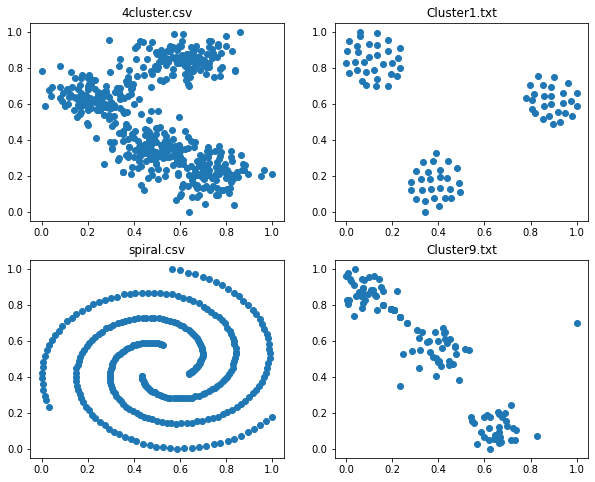

In [54]:
fig, ax = plt.subplots(2, 2)

ax[0, 0].set_title("4cluster.csv")
ax[0, 0].scatter(data_1.x, data_1.y)

ax[0, 1].set_title("Cluster1.txt")
ax[0, 1].scatter(data_2.x, data_2.y)

ax[1, 0].set_title("spiral.csv")
ax[1, 0].scatter(data_3.x, data_3.y)

ax[1, 1].set_title("Cluster9.txt")
ax[1, 1].scatter(data_4.x, data_4.y)

In [55]:
plt.rcParams["figure.figsize"] = (15, 5)

---

Cluster1.txt

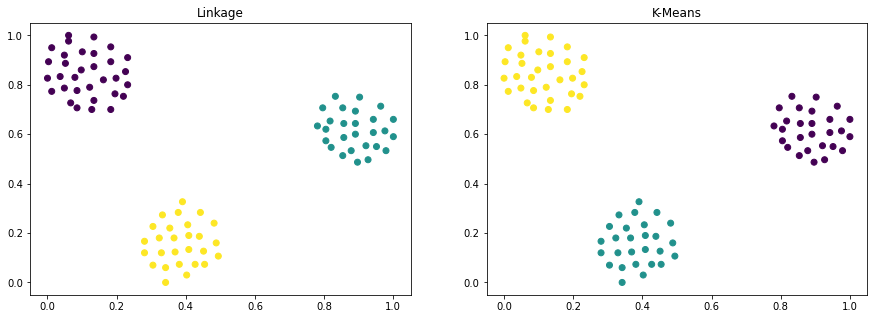

In [56]:
model_0 = AgglomerativeClustering(linkage="single", n_clusters=3, distance_threshold=None).fit(data_2)
model_1 = KMeans(n_clusters=3, init="k-means++").fit(data_2)

fig, ax = plt.subplots(1, 2)

ax[0].set_title("Linkage")
ax[0].scatter(data_2.x, data_2.y, c=model_0.labels_)

ax[1].set_title("K-Means")
ax[1].scatter(data_2.x, data_2.y, c=model_1.labels_)

4cluster.csv

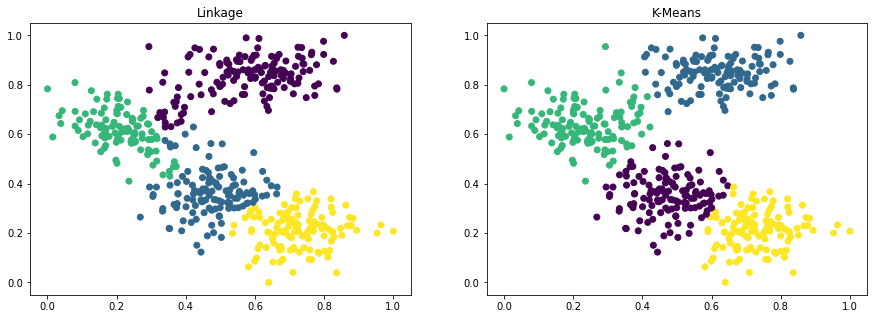

In [57]:
model_0 = AgglomerativeClustering(linkage="complete", n_clusters=4, distance_threshold=None).fit(data_1.loc[:, ["x", "y"]])
model_1 = KMeans(n_clusters=4, init="k-means++").fit(data_1.loc[:, ["x", "y"]])

fig, ax = plt.subplots(1, 2)

ax[0].set_title("Linkage")
ax[0].scatter(data_1.x, data_1.y, c=model_0.labels_)

ax[1].set_title("K-Means")
ax[1].scatter(data_1.x, data_1.y, c=model_1.labels_)

spiral.csv

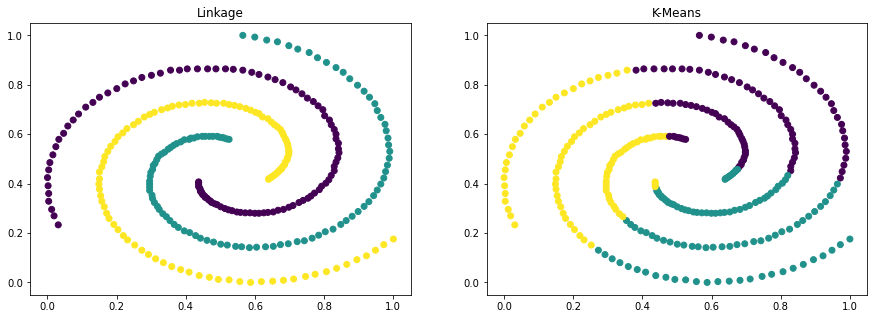

In [58]:
model_0 = AgglomerativeClustering(linkage="single", n_clusters=3, distance_threshold=None).fit(data_3.loc[:, ["x", "y"]])
model_1 = KMeans(n_clusters=3, init="k-means++").fit(data_3.loc[:, ["x", "y"]])

fig, ax = plt.subplots(1, 2)

ax[0].set_title("Linkage")
ax[0].scatter(data_3.x, data_3.y, c=model_0.labels_)

ax[1].set_title("K-Means")
ax[1].scatter(data_3.x, data_3.y, c=model_1.labels_)

Cluster9.txt

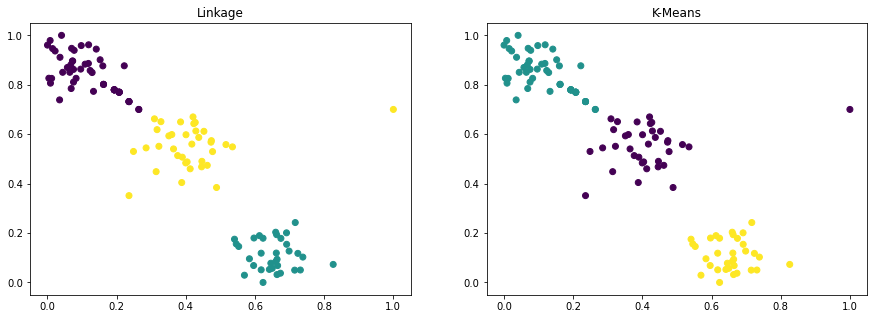

In [59]:
model_0 = AgglomerativeClustering(linkage="ward", n_clusters=3, distance_threshold=None).fit(data_4)
model_1 = KMeans(n_clusters=3, init="k-means++").fit(data_4)

fig, ax = plt.subplots(1, 2)

ax[0].set_title("Linkage")
ax[0].scatter(data_4.x, data_4.y, c=model_0.labels_)

ax[1].set_title("K-Means")
ax[1].scatter(data_4.x, data_4.y, c=model_1.labels_)